Firstly the cleaned 2011 files and 2021 files we need to match the LAD for both visualizing it in the tableau which is recognised and also to have a clean structure and mapping for both the 2011 and 2021 data 

First, I opened the FullMapData.hyper provided – opened in Tableau, selected the LAD Code, and then extracted it through the Data tab as a CSV file and from the 182549 detailed Engalnd and wales codes data – only extracted the unique 348 LAD names or codes that contain the LAD code with the LAD name for the value recognised in the Tableau 

In [90]:
# Loading the Full Data Unique file to extract the LAD for reference
# this will act as the master for 2011 and 2021

import pandas as pd

lad_reference = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Full Map Data shape file\Full_Data_Unique_LAD.csv")
lad_reference.columns = ["LAD_Code", "LAD_Name"]  

# aligning to refernece function for the 2011 and 2021 data 
def align_to_reference_clean(df, lad_ref, lad_col="LAD_Code", drop_cols=None):
    df = df.copy()
    
    # if needed renaming the column headers for eg in the 2021 the data contains the Geography as the LAD Name 
    # to avoid confusion
    if lad_col != "LAD_Code":
        df = df.rename(columns={lad_col: "LAD_Code"})
    
    # Dropping unwanted columns
    if drop_cols:
        df = df.drop(columns=drop_cols, errors='ignore')
    
    # selecting the numeric columns to add properly 
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    # merging with the LAD names and codes 
    merged = df.merge(lad_ref, on="LAD_Code", how="right")
    
    # Grouping by the new LAD_Code and LAD_Name and aggregate
    grouped = merged.groupby(["LAD_Code", "LAD_Name"], as_index=False)[numeric_cols].sum()
    return grouped

In [ ]:
# Applying to the 2011 data sets 
education_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_education_2011.csv", encoding="utf-8")
economic_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_economic_2011.csv", encoding="utf-8")
employment_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_employment_2011.csv", encoding="utf-8")
travel_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_travel_2011.csv", encoding="utf-8")
occupation_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_occupation_2011.csv", encoding="utf-8")
immigration_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\cleaned_immigration_2011.csv", encoding="utf-8")

# Ethinicity does not have the same data columns such as LAD Name or Code so we will be handling later on or maybe visualise it alone

# Apply function to align and aggregate

cleaned_education_2011 = align_to_reference_clean(
    education_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)
cleaned_economic_2011 = align_to_reference_clean(
    economic_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)

cleaned_employment_2011 = align_to_reference_clean(
    employment_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)
cleaned_travel_2011 = align_to_reference_clean(
    travel_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)

cleaned_occupation_2011  = align_to_reference_clean(
    occupation_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)
cleaned_immigration_2011  = align_to_reference_clean(
    immigration_2011,
    lad_reference,
    lad_col="Area code",
    drop_cols=["AREA NAME"]
)


In [92]:
import os

#output folder
output_folder = r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data"

# Saved each of the cleaned DataFrame to a CSV file
cleaned_education_2011.to_csv(os.path.join(output_folder, "final_education_2011.csv"), index=False)
cleaned_economic_2011.to_csv(os.path.join(output_folder, "final_economic_2011.csv"), index=False)
cleaned_employment_2011.to_csv(os.path.join(output_folder, "final_employment_2011.csv"), index=False)
cleaned_travel_2011.to_csv(os.path.join(output_folder, "final_travel_2011.csv"), index=False)
cleaned_occupation_2011.to_csv(os.path.join(output_folder, "final_occupation_2011.csv"), index=False)
cleaned_immigration_2011.to_csv(os.path.join(output_folder, "final_immigration_2011.csv"), index=False)

In [94]:
# Final check if there are missing values in ant of the files in 2011 
folder_path = r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_Data"

exclude_cols = {"LAD_Code", "LAD_Name"}
summary = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and filename.startswith("final_"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # Identifying the  columns to check (excluding LAD_Code and LAD_Name)
        cols_to_check = df.columns.difference(exclude_cols)

        # Find rows with all 0 or any NaN in these columns
        zero_or_nan_rows = df[
            df[cols_to_check].isna().any(axis=1) | (df[cols_to_check] == 0).all(axis=1)
        ]

        # Store the count and LAD codes for each of the file
        summary[filename] = {
            "count": zero_or_nan_rows.shape[0],
            "LAD_Codes": zero_or_nan_rows["LAD_Code"].tolist()
        }

for file, result in summary.items():
    print(f"\nFile: {file}")
    print("Zero or NaN Rows:", result["count"])
    print("Affected LAD Codes:", result["LAD_Codes"])


File: final_economic_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []

File: final_education_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []

File: final_employment_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []

File: final_immigration_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []

File: final_occupation_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []

File: final_travel_2011.csv
Zero or NaN Rows: 0
Affected LAD Codes: []


Now we will proceed to cleaning the 2021 which is slighly tricking as we need to update names and area codes to match and map the LAD Codes 

We have 3 tables for 2021 data - education, economic and occupation and now we will merge and map to the master file 

In [95]:
import pandas as pd

# Loading the data for 2021 
edu_2021 = pd.read_csv(r"C:\Users\pc\Desktop\FINAL VISUAL ANALYTICS\Cleaned_files\2021\education_2021.csv")
lad_reference = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Full Map Data shape file\Full_Data_Unique_LAD.csv")
lad_reference.columns = ["LAD_Code", "LAD_Name"]

# column names 
edu_2021.columns = edu_2021.columns.str.strip()
edu_2021 = edu_2021.rename(columns={
    "geography code": "LAD_Code",
    "geography": "LAD_Name"
})

# metadata and data columns
meta_cols = ["LAD_Code", "LAD_Name", "date"] if "date" in edu_2021.columns else ["LAD_Code", "LAD_Name"]
data_cols = edu_2021.columns.difference(meta_cols, sort=False)

edu_2021_valid = edu_2021[(edu_2021[data_cols] != 0).any(axis=1)].copy()
edu_2021_valid_indexed = edu_2021_valid.set_index("LAD_Code")

# Filter to LADs present in master reference 
final_clean = edu_2021_valid[edu_2021_valid["LAD_Code"].isin(lad_reference["LAD_Code"])].copy()
final_clean = final_clean.sort_values("LAD_Code")

# Finding the missing Lad references 
expected_codes = set(lad_reference["LAD_Code"])
existing_codes = set(final_clean["LAD_Code"])
missing_lad_codes = sorted(expected_codes - existing_codes)

# manually mapped from ONS changes and LAD merges from the master file - Full Map Data
fallback_mappings = {
    "E06000028": "E06000058",  # Bournemouth → Bournemouth, Christchurch and Poole
    "E06000029": "E06000058",  # Poole → Bournemouth, Christchurch and Poole
    "E07000048": "E06000058",  # Christchurch → Bournemouth, Christchurch and Poole
    "E07000049": "E06000058",  # East Dorset → BCP (best match)
    "E07000050": "E06000058",  # North Dorset → BCP
    "E07000051": "E06000058",  # Purbeck → BCP
    "E07000052": "E06000058",  # West Dorset → BCP
    "E07000053": "E06000058",  # Weymouth and Portland → BCP
    "E07000205": "E07000244",  # Suffolk Coastal → East Suffolk
    "E07000206": "E07000244",  # Waveney → East Suffolk
    "E07000201": "E07000244",  # Forest Heath → West Suffolk
    "E07000204": "E07000244",  # St Edmundsbury → West Suffolk
    "E07000150": "E07000243",  # Corby → North Northamptonshire
    "E07000151": "E07000243",  # Daventry → West Northamptonshire
    "E07000152": "E07000243",  # East Northamptonshire → North Northamptonshire
    "E07000153": "E07000243",
    "E07000154": "E07000243",
    "E07000155": "E07000243",
    "E07000156": "E07000243",
    "E07000004": "E07000242",  # Aylesbury Vale → Buckinghamshire
    "E07000005": "E07000242",
    "E07000006": "E07000242",
    "E07000007": "E07000242",
    "E07000097": "E07000242",
    "E07000100": "E07000242",
    "E07000101": "E07000242",
    "E07000104": "E07000242",
    "E07000190": "E07000246",  # Taunton Deane → Somerset
    "E07000191": "E07000246",  # West Somerset → Somerset
    "E08000020": "E08000021",  # Gateshead → use Newcastle as proxy
    "E06000048": "E06000047",  # Northumberland → County Durham
}

filled_rows_df = pd.DataFrame(filled_rows)

# Combining 
final_348 = pd.concat([final_clean, filled_rows_df], ignore_index=True)
final_348 = final_348.sort_values("LAD_Code")

final_path = r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\before_bayesian_education_2021.csv"
final_348.to_csv(final_path, index=False)

# Additionally i manually check the mapping and data sorting and three of the LAD was manually 
# checked and replaced 
# Folkestone and Hythe -> Shepway
# Vale of Glamorgan -> The Vale of Glamorgan 
# Rhondda Cynon Taff -> Rhondda Cynon Taf

# before bayesian the LAD values were filled as aggregate sum which led to non reliable data
# the actual data of 2021 has a complete table sum of - 97132682
# without bayesian and using the concatenated filled value gave a sum of = 102859518

# Therefore using the Bayesian algorithm to fill the missing values instead of the Aggreate mean or sum



Using Bayesian instead of aggreating above and fitting it in the overall sum of the 2021 data as well

In [97]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

# NOW TREATINF THE 2021 DATA USING BAYESIAN - We have 31 LAD Codes and Names which are null values for the eductaion
# econoic and occupation data 
# with use of the 2021 data without bayesian and using sum or concatenating

education_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\2021\education_2021.csv")
lad_reference = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Full Map Data shape file\Full_Data_Unique_LAD.csv")

# changing thr the master file column names 
education_2021.columns = education_2021.columns.str.strip()
lad_reference.columns = ["LAD_Code", "LAD_Name"]
education_2021 = education_2021.rename(columns={"geography code": "LAD_Code", "geography": "LAD_Name"})
meta_cols = ["LAD_Code", "LAD_Name", "date"] if "date" in education_2021.columns else ["LAD_Code", "LAD_Name"]
data_cols = education_2021.columns.difference(meta_cols, sort=False)

# filtering the valid LAD values 
education_valid = education_2021[(education_2021[data_cols] != 0).any(axis=1)].copy()
education_valid = education_valid[education_valid["LAD_Code"].isin(lad_reference["LAD_Code"])]

# checking the missing LADs - Going with code for reference 
expected_codes = set(lad_reference["LAD_Code"])
existing_codes = set(education_valid["LAD_Code"])
missing_lad_codes = sorted(expected_codes - existing_codes)

# Bayesian methods 
# imputing Missing LADs Using Bayesian Ridge Regression
# imputed values and credible intervals data
imputed_data = defaultdict(list)
credible_intervals = {}
value_cols = list(data_cols)

# In each column and training a Bayesian model using the others LAD values 
for col in data_cols:

     # training data exclsuing the current column 
    X_train = education_valid[data_cols.difference([col])].dropna()
    y_train = education_valid.loc[X_train.index, col]
    if len(X_train) < 10:
        continue
    
    # normalising the features for the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    
    #fitting the Bayesian Ridge model
    model = BayesianRidge()
    model.fit(X_scaled, y_train)

    # uncertainty estimates
    # predicting the missing LAD values here
    X_missing = np.tile(np.mean(X_scaled, axis=0), (len(missing_lad_codes), 1))
    pred_mean, pred_std = model.predict(X_missing, return_std=True)
    
    #Computing the 95% credible intervals
    lower_bound = pred_mean - 1.96 * pred_std
    upper_bound = pred_mean + 1.96 * pred_std

    # Storing the predicted values and intervals
    imputed_data[col] = pred_mean
    credible_intervals[col + "_lower"] = lower_bound
    credible_intervals[col + "_upper"] = upper_bound

# Mapping the LAD names from the master data and then predicted the values and merging the credible intervals

imputed_df = pd.DataFrame(imputed_data)
imputed_df["LAD_Code"] = missing_lad_codes
imputed_df["LAD_Name"] = imputed_df["LAD_Code"].map(dict(zip(lad_reference["LAD_Code"], lad_reference["LAD_Name"])))
intervals_df = pd.DataFrame(credible_intervals)
imputed_df = pd.concat([imputed_df.reset_index(drop=True), intervals_df.reset_index(drop=True)], axis=1)

# the target value from the 2021 data file of all the known LADs
# Got this sum number frm the 2021 education original file
# unsing this sum of the table to have a boundary targeet total for the 2021 education 2021
target_total = 97132682

# current and imputed totals
existing_total = education_valid[data_cols].sum().sum()
imputed_total = imputed_df[data_cols].sum().sum()
scaling_factor = (target_total - existing_total) / imputed_total

# Applying the scaling to all imputed numeric columns to give whole number
for col in data_cols:
    imputed_df[col] = imputed_df[col] * scaling_factor
imputed_df[data_cols] = imputed_df[data_cols].round(0).astype(int)
for col in credible_intervals:
    imputed_df[col] = imputed_df[col].round(0).astype(int)
for col in credible_intervals:
    education_valid[col] = np.nan
education_valid[data_cols] = education_valid[data_cols].round(0).astype(int)

# Reordering and combining the columns for final_education_2021
ordered_cols = ["LAD_Code", "LAD_Name"] + value_cols + list(credible_intervals.keys())
education_valid = education_valid[ordered_cols]
imputed_df = imputed_df[ordered_cols]
final_df = pd.concat([education_valid, imputed_df], ignore_index=True).sort_values("LAD_Code")

# manually fixing a few LADs to rename to updated names
manual_name_fixes = {
    "Folkestone and Hythe" :"Shepway",
    "Vale of Glamorgan": "The Vale of Glamorgan",
    "Rhondda Cynon Taff": "Rhondda Cynon Taf"
}
final_df["LAD_Name"] = final_df["LAD_Name"].replace(manual_name_fixes)

final_df.to_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_education_2021.csv", index=False)


In [98]:
# similarly for the 31 LADs missing values -for occupation_2021 data
occupation_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\2021\occupation_2021.csv")
lad_reference = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Full Map Data shape file\Full_Data_Unique_LAD.csv")

occupation_2021.columns = occupation_2021.columns.str.strip()
lad_reference.columns = ["LAD_Code", "LAD_Name"]
occupation_2021 = occupation_2021.rename(columns={"geography code": "LAD_Code", "geography": "LAD_Name"})

meta_cols = ["LAD_Code", "LAD_Name", "date"] if "date" in occupation_2021.columns else ["LAD_Code", "LAD_Name"]
data_cols = occupation_2021.columns.difference(meta_cols, sort=False)

occupation_valid = occupation_2021[(occupation_2021[data_cols] != 0).any(axis=1)].copy()
occupation_valid = occupation_valid[occupation_valid["LAD_Code"].isin(lad_reference["LAD_Code"])]

expected_codes = set(lad_reference["LAD_Code"])
existing_codes = set(occupation_valid["LAD_Code"])
missing_lad_codes = sorted(expected_codes - existing_codes)

imputed_data = defaultdict(list)
credible_intervals = {}
value_cols = list(data_cols)

for col in data_cols:
    X_train = occupation_valid[data_cols.difference([col])].dropna()
    y_train = occupation_valid.loc[X_train.index, col]
    if len(X_train) < 10:
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    model = BayesianRidge()
    model.fit(X_scaled, y_train)
    X_missing = np.tile(np.mean(X_scaled, axis=0), (len(missing_lad_codes), 1))
    pred_mean, pred_std = model.predict(X_missing, return_std=True)
    lower_bound = pred_mean - 1.96 * pred_std
    upper_bound = pred_mean + 1.96 * pred_std
    imputed_data[col] = pred_mean
    credible_intervals[col + "_lower"] = lower_bound
    credible_intervals[col + "_upper"] = upper_bound

imputed_df = pd.DataFrame(imputed_data)
imputed_df["LAD_Code"] = missing_lad_codes
imputed_df["LAD_Name"] = imputed_df["LAD_Code"].map(dict(zip(lad_reference["LAD_Code"], lad_reference["LAD_Name"])))
intervals_df = pd.DataFrame(credible_intervals)
imputed_df = pd.concat([imputed_df.reset_index(drop=True), intervals_df.reset_index(drop=True)], axis=1)

# the target value from the 2021 data file of all the known LADs
# Got this sum number frm the 2021 occupation original file
# unsing this sum of the table to have a boundary targeet total for the 2021 occupation file
target_total = 55547384
existing_total = occupation_valid[data_cols].sum().sum()
imputed_total = imputed_df[data_cols].sum().sum()
scaling_factor = (target_total - existing_total) / imputed_total

for col in data_cols:
    imputed_df[col] = imputed_df[col] * scaling_factor

imputed_df[data_cols] = imputed_df[data_cols].round(0).astype(int)
for col in credible_intervals:
    imputed_df[col] = imputed_df[col].round(0).astype(int)
for col in credible_intervals:
    occupation_valid[col] = np.nan
occupation_valid[data_cols] = occupation_valid[data_cols].round(0).astype(int)

ordered_cols = ["LAD_Code", "LAD_Name"] + value_cols + list(credible_intervals.keys())
occupation_valid = occupation_valid[ordered_cols]
imputed_df = imputed_df[ordered_cols]
final_df = pd.concat([occupation_valid, imputed_df], ignore_index=True).sort_values("LAD_Code")

manual_name_fixes = {
    "Folkestone and Hythe" :"Shepway",
    "Vale of Glamorgan": "The Vale of Glamorgan",
    "Rhondda Cynon Taff": "Rhondda Cynon Taf"
}
final_df["LAD_Name"] = final_df["LAD_Name"].replace(manual_name_fixes)

final_df.to_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_occupation_2021.csv", index=False)


In [99]:
# Similary for the economic 2021 data file
economic_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Clean_files_2011\2021\economic_2021.csv")
lad_reference = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Full Map Data shape file\Full_Data_Unique_LAD.csv")

economic_2021.columns = economic_2021.columns.str.strip()
lad_reference.columns = ["LAD_Code", "LAD_Name"]
economic_2021 = economic_2021.rename(columns={"geography code": "LAD_Code", "geography": "LAD_Name"})

meta_cols = ["LAD_Code", "LAD_Name", "date"] if "date" in economic_2021.columns else ["LAD_Code", "LAD_Name"]
data_cols = economic_2021.columns.difference(meta_cols, sort=False)

economic_valid = economic_2021[(economic_2021[data_cols] != 0).any(axis=1)].copy()
economic_valid = economic_valid[economic_valid["LAD_Code"].isin(lad_reference["LAD_Code"])]
expected_codes = set(lad_reference["LAD_Code"])
existing_codes = set(economic_valid["LAD_Code"])
missing_lad_codes = sorted(expected_codes - existing_codes)

# Bayesian Ridge Regression to impute missing LADs
imputed_data = defaultdict(list)
credible_intervals = {}
value_cols = list(data_cols)

for col in data_cols:
    X_train = economic_valid[data_cols.difference([col])].dropna()
    y_train = economic_valid.loc[X_train.index, col]
    if len(X_train) < 10:
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    model = BayesianRidge()
    model.fit(X_scaled, y_train)
    X_missing = np.tile(np.mean(X_scaled, axis=0), (len(missing_lad_codes), 1))
    pred_mean, pred_std = model.predict(X_missing, return_std=True)
    lower_bound = pred_mean - 1.96 * pred_std
    upper_bound = pred_mean + 1.96 * pred_std
    imputed_data[col] = pred_mean
    credible_intervals[col + "_lower"] = lower_bound
    credible_intervals[col + "_upper"] = upper_bound

imputed_df = pd.DataFrame(imputed_data)
imputed_df["LAD_Code"] = missing_lad_codes
imputed_df["LAD_Name"] = imputed_df["LAD_Code"].map(dict(zip(lad_reference["LAD_Code"], lad_reference["LAD_Name"])))

intervals_df = pd.DataFrame(credible_intervals)
imputed_df = pd.concat([imputed_df.reset_index(drop=True), intervals_df.reset_index(drop=True)], axis=1)

# Setting the known 2021 total from original economic_2021 (sum of all known LAD values)
target_total = 201246425

existing_total = economic_valid[data_cols].sum().sum()
imputed_total = imputed_df[data_cols].sum().sum()
scaling_factor = (target_total - existing_total) / imputed_total

for col in data_cols:
    imputed_df[col] = imputed_df[col] * scaling_factor

imputed_df[data_cols] = imputed_df[data_cols].round(0).astype(int)
for col in credible_intervals:
    imputed_df[col] = imputed_df[col].round(0).astype(int)
for col in credible_intervals:
    economic_valid[col] = np.nan

economic_valid[data_cols] = economic_valid[data_cols].round(0).astype(int)

ordered_cols = ["LAD_Code", "LAD_Name"] + value_cols + list(credible_intervals.keys())
economic_valid = economic_valid[ordered_cols]
imputed_df = imputed_df[ordered_cols]
final_df = pd.concat([economic_valid, imputed_df], ignore_index=True).sort_values("LAD_Code")

manual_name_fixes = {
    "Folkestone and Hythe": "Shepway",
    "Vale of Glamorgan": "The Vale of Glamorgan",
    "Rhondda Cynon Taff": "Rhondda Cynon Taf"
}
final_df["LAD_Name"] = final_df["LAD_Name"].replace(manual_name_fixes)

final_df.to_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_economic_2021.csv", index=False)


## Merging the files for 2011 and 2021 for the Tablueau Visualization 

In [102]:
import pandas as pd

# Loading the 2011 files again 
edu_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_education_2011.csv")
eco_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_economic_2011.csv")
occ_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_occupation_2011.csv")
emp_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_employment_2011.csv")
imm_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_immigration_2011.csv")
trav_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_travel_2011.csv")

# Loading the 2021 files again the final ones
edu_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_education_2021.csv")
eco_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_economic_2021.csv")
occ_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_occupation_2021.csv")

# merging on the LAD Code an Name 
merge_keys = ["LAD_Code", "LAD_Name"]

# Merge all 2011 datasets
merged_2011 = edu_2011.merge(eco_2011, on=merge_keys, how='left') \
                      .merge(emp_2011, on=merge_keys, how='left') \
                      .merge(occ_2011, on=merge_keys, how='left') \
                      .merge(imm_2011, on=merge_keys, how='left') \
                      .merge(trav_2011, on=merge_keys, how='left')

# merging the 2021 files 
merged_2021 = edu_2021.merge(eco_2021, on=merge_keys, how='left') \
                      .merge(occ_2021, on=merge_keys, how='left')

merged_2011.to_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\merged_all_2011.csv", index=False)
merged_2021.to_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\merged_all_2021.csv", index=False)

print("Merged files saved as 'merged_all_2011.csv' and 'merged_all_2021.csv'")


Merged files saved as 'merged_all_2011.csv' and 'merged_all_2021.csv'


In [144]:
# Now merging the 2011 and 2021 files and adding a column year to create a union to visualise easily
# loading the merged files of 2011 and 2021
df_2011 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\merged_all_2011.csv")
df_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\merged_all_2021.csv")

# Adding the year columns
df_2011['Year'] = 2011
df_2021['Year'] = 2021

# renaming the 2021 column names for education, economic and occupation for easy merging 
rename_2021 = {
    # Education
    'Highest level of qualification: Total: All usual residents aged 16 years and over': 'All categories: Highest level of qualification',
    'Highest level of qualification: No qualifications': 'No qualifications',
    'Highest level of qualification: Level 1 and entry level qualifications': 'Highest level of qualification: Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications': 'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship': 'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications': 'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above': 'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications': 'Highest level of qualification: Other qualifications',

    # Economic
    'Economic activity status: Total: All usual residents aged 16 years and over': 'All categories: Economic activity_x',
    'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Part-time': 'Economically active: Employee: Part-time',
    'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Full-time': 'Economically active: Employee: Full-time',
    'Economic activity status: Economically active (excluding full-time students): Unemployed': 'Economically active: Unemployed',
    'Economic activity status: Economically active and a full-time student': 'Economically active: Full-time student',
    'Economic activity status: Economically inactive: Retired': 'Economically inactive: Retired',
    'Economic activity status: Economically inactive: Student': 'Economically inactive: Student (including full-time students)',
    'Economic activity status: Economically inactive: Looking after home or family': 'Economically inactive: Looking after home or family',
    'Economic activity status: Economically inactive: Long-term sick or disabled': 'Economically inactive: Long-term sick or disabled',
    'Economic activity status: Economically inactive: Other': 'Economically inactive: Other',

    # Occupation
    'Occupation (current): Total: All usual residents aged 16 years and over in employment the week before the census': 'All categories: Occupation',
    'Occupation (current): 1. Managers, directors and senior officials': '1. Managers, directors and senior officials',
    'Occupation (current): 2. Professional occupations': '2. Professional occupations',
    'Occupation (current): 3. Associate professional and technical occupations': '3. Associate professional and technical occupations',
    'Occupation (current): 4. Administrative and secretarial occupations': '4. Administrative and secretarial occupations',
    'Occupation (current): 5. Skilled trades occupations': '5. Skilled trades occupations',
    'Occupation (current): 6. Caring, leisure and other service occupations': '6. Caring, leisure and other service occupations',
    'Occupation (current): 7. Sales and customer service occupations': '7. Sales and customer service occupations',
    'Occupation (current): 8. Process, plant and machine operatives': '8. Process, plant and machine operatives',
    'Occupation (current): 9. Elementary occupations': '9. Elementary occupations'
}


# Corrected approach:
# in df_2021 after renaming and creating a new dataframe that includes only columns also in df_2011.
# Filling non-existent columns with 0 and keep others mapped to LAD_Code, LAD_Name and values from 2021.


df_2011['Year'] = 2011

# Renamed education, economic, and occupation columns in df_2021
df_2021_renamed = df_2021.rename(columns=rename_2021)

df_2021_aligned = pd.DataFrame(columns=df_2011.columns)
df_2021_aligned['LAD_Code'] = df_2021_renamed['LAD_Code']
df_2021_aligned['LAD_Name'] = df_2021_renamed['LAD_Name']
df_2021_aligned['Year'] = 2021

for col in df_2021_renamed.columns:
    if col in df_2021_aligned.columns:
        df_2021_aligned[col] = df_2021_renamed[col]

df_2021_aligned = df_2021_aligned.fillna(0)

df_final_correct = pd.concat([df_2011, df_2021_aligned], ignore_index=True)


final_path = r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_merged_2011_2021.csv"
df_final_correct.to_csv(final_path, index=False)


C:\Users\pc\AppData\Local\Temp\ipykernel_22044\1978435238.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2021_aligned = df_2021_aligned.fillna(0)


UMAP clustering 

In [145]:
# saving the renamed columns 2021 merged file to use it for the clustering 
df_2021 = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\merged_all_2021.csv")

rename_2021 = {
    # Education
    'Highest level of qualification: Total: All usual residents aged 16 years and over': 'All categories: Highest level of qualification',
    'Highest level of qualification: No qualifications': 'No qualifications',
    'Highest level of qualification: Level 1 and entry level qualifications': 'Highest level of qualification: Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications': 'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship': 'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications': 'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above': 'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications': 'Highest level of qualification: Other qualifications',

    # Economic
    'Economic activity status: Total: All usual residents aged 16 years and over': 'All categories: Economic activity_x',
    'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Part-time': 'Economically active: Employee: Part-time',
    'Economic activity status: Economically active (excluding full-time students): In employment: Employee: Full-time': 'Economically active: Employee: Full-time',
    'Economic activity status: Economically active (excluding full-time students): Unemployed': 'Economically active: Unemployed',
    'Economic activity status: Economically active and a full-time student': 'Economically active: Full-time student',
    'Economic activity status: Economically inactive: Retired': 'Economically inactive: Retired',
    'Economic activity status: Economically inactive: Student': 'Economically inactive: Student (including full-time students)',
    'Economic activity status: Economically inactive: Looking after home or family': 'Economically inactive: Looking after home or family',
    'Economic activity status: Economically inactive: Long-term sick or disabled': 'Economically inactive: Long-term sick or disabled',
    'Economic activity status: Economically inactive: Other': 'Economically inactive: Other',

    # Occupation
    'Occupation (current): Total: All usual residents aged 16 years and over in employment the week before the census': 'All categories: Occupation',
    'Occupation (current): 1. Managers, directors and senior officials': '1. Managers, directors and senior officials',
    'Occupation (current): 2. Professional occupations': '2. Professional occupations',
    'Occupation (current): 3. Associate professional and technical occupations': '3. Associate professional and technical occupations',
    'Occupation (current): 4. Administrative and secretarial occupations': '4. Administrative and secretarial occupations',
    'Occupation (current): 5. Skilled trades occupations': '5. Skilled trades occupations',
    'Occupation (current): 6. Caring, leisure and other service occupations': '6. Caring, leisure and other service occupations',
    'Occupation (current): 7. Sales and customer service occupations': '7. Sales and customer service occupations',
    'Occupation (current): 8. Process, plant and machine operatives': '8. Process, plant and machine operatives',
    'Occupation (current): 9. Elementary occupations': '9. Elementary occupations'
}

df_2021_renamed_only = df_2021.rename(columns=rename_2021)

renamed_output_path = "merged_renamed_columns.csv"
df_2021_renamed_only.to_csv(renamed_output_path, index=False)

renamed_output_path


'merged_renamed_columns.csv'

UMAP - K means clustering using for the education, economic and occupation data 

c:\Users\pc\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pc\anaconda3\envs\text_analytics\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


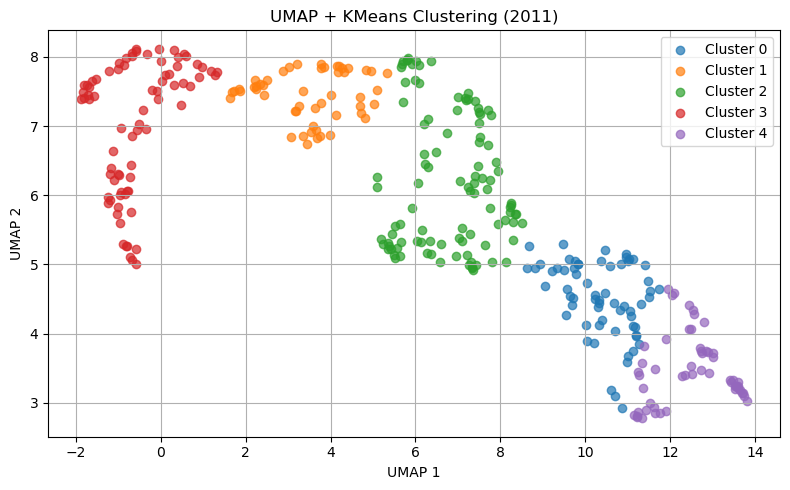

c:\Users\pc\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pc\anaconda3\envs\text_analytics\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


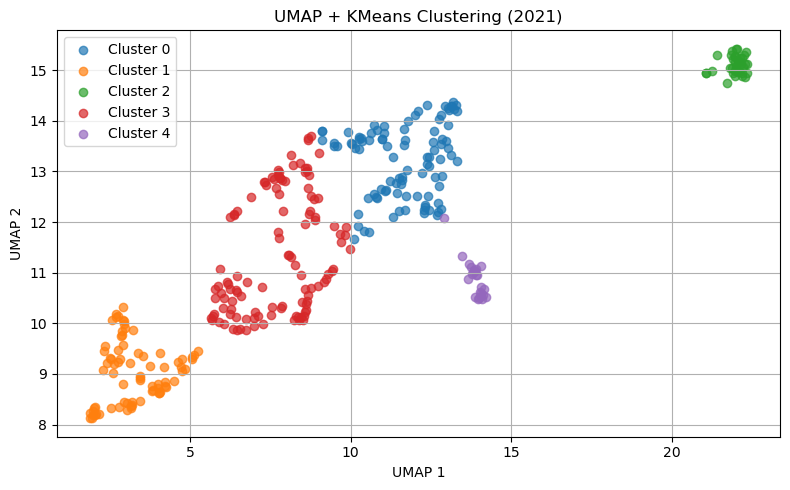

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
df_2021 = pd.read_csv("merged_renamed_columns.csv")

target_columns = [
    'All categories: Highest level of qualification',
    'No qualifications',
    'Highest level of qualification: Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications',
    'All categories: Economic activity_x',
    'Economically active: Employee: Part-time',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Economically active: Full-time student',
    'Economically inactive: Retired',
    'Economically inactive: Student (including full-time students)',
    'Economically inactive: Looking after home or family',
    'Economically inactive: Long-term sick or disabled',
    'Economically inactive: Other',
    'All categories: Occupation',
    '1. Managers, directors and senior officials',
    '2. Professional occupations',
    '3. Associate professional and technical occupations',
    '4. Administrative and secretarial occupations',
    '5. Skilled trades occupations',
    '6. Caring, leisure and other service occupations',
    '7. Sales and customer service occupations',
    '8. Process, plant and machine operatives',
    '9. Elementary occupations'
]

# UMAP clustering with k means function
def process_umap_clustering(df, year, n_clusters=5):
    df_clean = df[['LAD_Code', 'LAD_Name'] + target_columns].fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[target_columns])
    
    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_umap)
    
    result_df = pd.DataFrame({
        'LAD_Code': df_clean['LAD_Code'],
        'LAD_Name': df_clean['LAD_Name'],
        'UMAP_1': X_umap[:, 0],
        'UMAP_2': X_umap[:, 1],
        'Cluster': clusters
    })
    
    result_df.to_csv(f'umap_kmeans_{year}.csv', index=False)
    
    plt.figure(figsize=(8, 5))
    for i in range(n_clusters):
        subset = result_df[result_df["Cluster"] == i]
        plt.scatter(subset["UMAP_1"], subset["UMAP_2"], label=f'Cluster {i}', alpha=0.7)
    plt.title(f"UMAP + KMeans Clustering ({year})")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"umap_plot_{year}.png")
    plt.show()
    
    return result_df

# using the function for 2011 and 2021 data
result_2011 = process_umap_clustering(df_2011, "2011")
result_2021 = process_umap_clustering(df_2021, "2021")

In [148]:
df_umap_2011 = pd.read_csv("umap_kmeans_2011.csv")
df_umap_2021 = pd.read_csv("umap_kmeans_2021.csv")

# number of LADs per cluster for each year
summary_2011 = df_umap_2011.groupby("Cluster")["LAD_Name"].count().reset_index(name="LADs_2011")
summary_2021 = df_umap_2021.groupby("Cluster")["LAD_Name"].count().reset_index(name="LADs_2021")

summary_comparison = pd.merge(summary_2011, summary_2021, on="Cluster", how="outer").fillna(0).astype({"LADs_2011": int, "LADs_2021": int})

from IPython.display import display
display(summary_comparison)

,Cluster,LADs_2011,LADs_2021
0,0,64,97
1,1,51,76
2,2,102,36
3,3,77,115
4,4,54,24


In [ ]:
# computing the average the of all the target columns to understand the clustering 
df_2021 = pd.read_csv("merged_renamed_columns.csv")
df_umap_2011 = pd.read_csv("umap_kmeans_2011.csv")
df_umap_2021 = pd.read_csv("umap_kmeans_2021.csv")

education_cols = [
    'All categories: Highest level of qualification',
    'No qualifications',
    'Highest level of qualification: Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications'
]

economic_cols = [
    'All categories: Economic activity_x',
    'Economically active: Employee: Part-time',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Economically active: Full-time student',
    'Economically inactive: Retired',
    'Economically inactive: Student (including full-time students)',
    'Economically inactive: Looking after home or family',
    'Economically inactive: Long-term sick or disabled',
    'Economically inactive: Other'
]

occupation_cols = [
    'All categories: Occupation',
    '1. Managers, directors and senior officials',
    '2. Professional occupations',
    '3. Associate professional and technical occupations',
    '4. Administrative and secretarial occupations',
    '5. Skilled trades occupations',
    '6. Caring, leisure and other service occupations',
    '7. Sales and customer service occupations',
    '8. Process, plant and machine operatives',
    '9. Elementary occupations'
]

target_columns = education_cols + economic_cols + occupation_cols

df_2011_clustered = pd.merge(df_2011, df_umap_2011[['LAD_Code', 'Cluster']], on='LAD_Code', how='inner')
df_2021_clustered = pd.merge(df_2021, df_umap_2021[['LAD_Code', 'Cluster']], on='LAD_Code', how='inner')

avg_2011 = df_2011_clustered.groupby('Cluster')[target_columns].mean()
avg_2021 = df_2021_clustered.groupby('Cluster')[target_columns].mean()

avg_2011.to_csv("cluster_feature_averages_2011.csv")
avg_2021.to_csv("cluster_feature_averages_2021.csv")

print("2011 Cluster Feature Averages:\n", avg_2011.head())
print("\n2021 Cluster Feature Averages:\n", avg_2021.head())


2011 Cluster Feature Averages:
          All categories: Highest level of qualification  No qualifications  \
Cluster                                                                      
0                                          77077.593750       18504.343750   
1                                         146271.509804       32330.745098   
2                                         103446.127451       22868.166667   
3                                         254797.584416       58577.935065   
4                                          54315.703704       11687.537037   

         Highest level of qualification: Level 1 qualifications  \
Cluster                                                           
0                                             11196.781250        
1                                             21113.764706        
2                                             13762.941176        
3                                             31868.051948        
4                  

TSNE

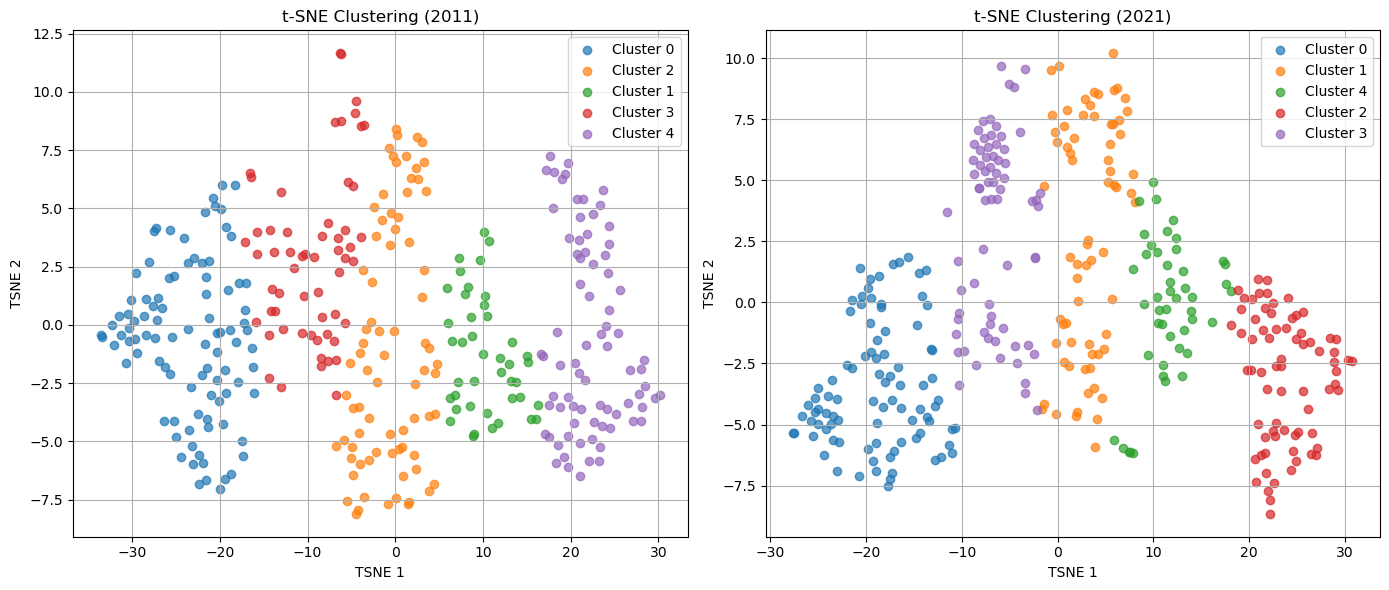

In [156]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df_2021 = pd.read_csv("merged_renamed_columns.csv")

target_columns = [ 
    'All categories: Highest level of qualification',
    'No qualifications',
    'Highest level of qualification: Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications',
    'Highest level of qualification: Apprenticeship',
    'Highest level of qualification: Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications',
    'All categories: Economic activity_x',
    'Economically active: Employee: Part-time',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Economically active: Full-time student',
    'Economically inactive: Retired',
    'Economically inactive: Student (including full-time students)',
    'Economically inactive: Looking after home or family',
    'Economically inactive: Long-term sick or disabled',
    'Economically inactive: Other',
    'All categories: Occupation',
    '1. Managers, directors and senior officials',
    '2. Professional occupations',
    '3. Associate professional and technical occupations',
    '4. Administrative and secretarial occupations',
    '5. Skilled trades occupations',
    '6. Caring, leisure and other service occupations',
    '7. Sales and customer service occupations',
    '8. Process, plant and machine operatives',
    '9. Elementary occupations'
]

# tsne k means clustering 
def tsne_kmeans(df, year, n_clusters=5):
    df_clean = df[['LAD_Code', 'LAD_Name'] + target_columns].fillna(0).copy()
    X = StandardScaler().fit_transform(df_clean[target_columns])
    X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
    clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_tsne)
    return pd.DataFrame({
        'LAD_Code': df_clean['LAD_Code'],
        'LAD_Name': df_clean['LAD_Name'],
        'TSNE_1': X_tsne[:, 0],
        'TSNE_2': X_tsne[:, 1],
        'Cluster': clusters,
        'Year': year
    })


result_2011 = tsne_kmeans(df_2011, "2011")
result_2021 = tsne_kmeans(df_2021, "2021")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for year, result, ax in zip(["2011", "2021"], [result_2011, result_2021], axes):
    for c in result['Cluster'].unique():
        cluster_data = result[result['Cluster'] == c]
        ax.scatter(cluster_data['TSNE_1'], cluster_data['TSNE_2'], label=f'Cluster {c}', alpha=0.7)
    ax.set_title(f"t-SNE Clustering ({year})")
    ax.set_xlabel("TSNE 1")
    ax.set_ylabel("TSNE 2")
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()


In [157]:
result_2011.to_csv("tsne_kmeans_2011.csv", index=False)
result_2021.to_csv("tsne_kmeans_2021.csv", index=False)


In [158]:
# merging all the tsne clustering files and the umap files to add in the 2011 and 2021 final file
df_tsne_2011 = pd.read_csv("tsne_kmeans_2011.csv")
df_tsne_2021 = pd.read_csv("tsne_kmeans_2021.csv")
df_umap_2011 = pd.read_csv("umap_kmeans_2011.csv")
df_umap_2021 = pd.read_csv("umap_kmeans_2021.csv")

# Add Year column to each dataframe before merging
df_umap_2011['Year'] = 2011
df_umap_2021['Year'] = 2021
df_tsne_2011['Year'] = 2011
df_tsne_2021['Year'] = 2021

# Merging the UMAP and TSNE for each year first
merged_2011 = pd.merge(df_umap_2011, df_tsne_2011, on=["LAD_Code", "LAD_Name", "Year"], how="outer")
merged_2021 = pd.merge(df_umap_2021, df_tsne_2021, on=["LAD_Code", "LAD_Name", "Year"], how="outer")

# Combining both years into one final dataframe
merged_all_years = pd.concat([merged_2011, merged_2021], ignore_index=True)


final_yearwise_tsne_umap = "final_cluster_data_with_year_column.csv"
merged_all_years.to_csv(final_yearwise_tsne_umap, index=False)

final_yearwise_tsne_umap


'final_cluster_data_with_year_column.csv'

In [159]:
#  the full final data with socio-economic variables for both years with umap and tsne
df_final_final = pd.read_csv(r"C:\Users\pc\Desktop\Visual_Analytics_Coursework_Final\Final_data\final_merged_2011_2021.csv")

# the UMAP and TSNE cluster file with unified Year column
df_clusters = pd.read_csv("final_cluster_data_with_year_column.csv")

# merging the clusters values with the final dataset using LAD_Code, LAD_Name, and Year
df_merged_visual = pd.merge(
    df_final_final,
    df_clusters,
    on=["LAD_Code", "LAD_Name", "Year"],
    how="left"
)

# final file for Tableau visualization 
final = "FINAL_2011_2021_MERGED.csv"
df_merged_visual.to_csv(final, index=False)

final


'FINAL_2011_2021_MERGED.csv'